# Worksheet 16

Name: Tyler Nguyen
UID: U13947916

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [11]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def kernel_function(x1, x2):
    return np.dot(x1, x2)
    
def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    # Compute the decision function value for the input point x
    decision_value = np.sum(alpha_i * Y * kernel_function(X, x)) + b
    
    # Classify the input point based on the sign of the decision function value
    if decision_value >= 0:
        return 1
    else:
        return -1

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    x, y = X[i], Y[i]
    error = False

    # Compute the decision function value for the input point x
    y_predict = predict(alpha_i, b, x)
    
    # Check if the point is misclassified
    if y * y_predict <= 0:
        error = True 
        
        # Update model parameters based on the perceptron learning rule
        alpha_i[i] += learning_rate * y
        b += learning_rate * y
        
        # Adjust the margin
        alpha_i *= expanding_rate
        b *= expanding_rate
    else:
        # If correctly classified, retract the size of the margin if needed
        if abs(y_predict) < 1:
            alpha_i *= retracting_rate
            b *= retracting_rate
    
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [7]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

You can decrease n to lessen the overfitting. 

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

You can increase the value of sigma.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

In [12]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"
epochs = 100
learning_rate = 0.05
expanding_rate = 0.99
retracting_rate = 1.1

# Load the dataset
data = np.loadtxt("spiral.data")
X, Y = data[:, :2], data[:, 2]

alpha_i = np.zeros((len(X),))
b = 0

def kernel_function(x1, x2):
    return np.dot(x1, x2)

def snap(x, alpha_i, b, error):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap=plt.cm.Paired)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r', fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y', fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <= 0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    decision_value = np.sum(alpha_i * Y * kernel_function(X, x)) + b
    return np.sign(decision_value)

images = []
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    x, y = X[i], Y[i]
    error = False

    y_predict = predict(alpha_i, b, x)
    
    if y * y_predict <= 0:
        error = True 
        alpha_i[i] += learning_rate * y
        b += learning_rate * y
        alpha_i *= expanding_rate
        b *= expanding_rate
    else:
        if abs(y_predict) < 1:
            alpha_i *= retracting_rate
            b *= retracting_rate
    
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


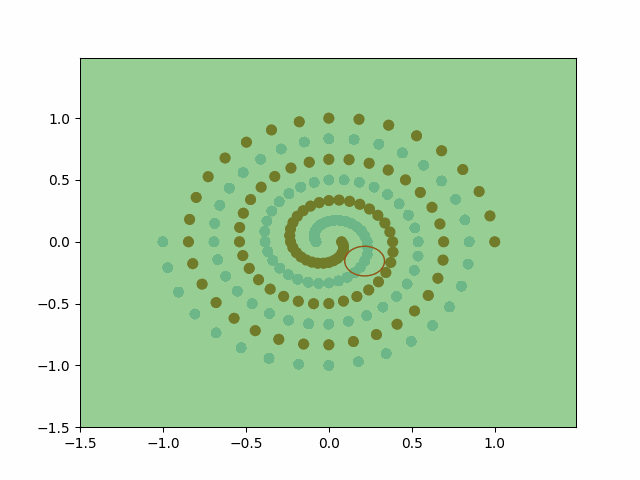

In [13]:
from IPython.display import Image

# Display the GIF in the notebook
Image(filename='svm_dual.gif')